In [1]:
import pandas as pd
from pycaret.classification import *
train = pd.read_csv("../../datasets/classification/train.csv")
test = pd.read_csv("../../datasets/classification/test.csv")
dataset = train.append(test, ignore_index = True)

dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Function _setup_

- Infer datatypes
- Analyze dataset
- Perform preprocessing operations
- Returns some useful information about the dataset

In [3]:
s = setup(train, target = "satisfaction", test_data = test)

,Description,Value
0,session_id,1602
1,Target,satisfaction
2,Target Type,Binary
3,Label Encoded,"neutral or dissatisfied: 0, satisfied: 1"
4,Original Data,"(103904, 25)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


### Function _compare\_models_

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.

In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9652,0.9953,0.9427,0.9762,0.9592,0.9289,0.9294,0.6190
rf,Random Forest Classifier,0.9626,0.9941,0.9387,0.9741,0.9561,0.9236,0.9241,4.2560
et,Extra Trees Classifier,0.9620,0.9935,0.9389,0.9724,0.9554,0.9223,0.9227,5.8370
dt,Decision Tree Classifier,0.9487,0.9479,0.9423,0.9394,0.9409,0.8955,0.8956,0.5240
gbc,Gradient Boosting Classifier,0.9468,0.9886,0.9236,0.9522,0.9377,0.8913,0.8916,12.3210
ridge,Ridge Classifier,0.9307,0.0000,0.9068,0.9315,0.9190,0.8584,0.8587,0.1040
lda,Linear Discriminant Analysis,0.9307,0.9757,0.9070,0.9314,0.9190,0.8585,0.8587,1.6910
ada,Ada Boost Classifier,0.9285,0.9782,0.9116,0.9225,0.9170,0.8542,0.8543,2.8510
nb,Naive Bayes,0.8106,0.8633,0.7930,0.7751,0.7839,0.6153,0.6155,0.1390
lr,Logistic Regression,0.7510,0.7885,0.6431,0.7326,0.6826,0.4817,0.4849,1.5360


In [5]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1602, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Function _evaluate\_model/1_

This function analyzes the performance of a trained model on the test set.

In [6]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

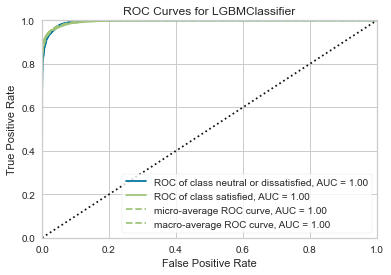

In [7]:
plot_model(best, plot = 'auc')

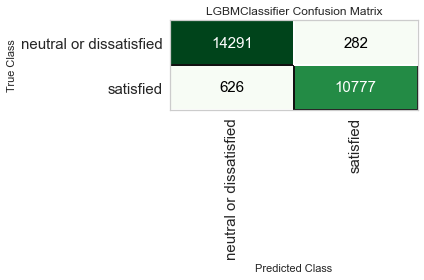

In [8]:
plot_model(best, plot = 'confusion_matrix')

### _predict\_model_

This function predicts the Label and the Score (probability of predicted class) columns using a trained model.

To see the probability of both the classes, simply pass raw_score = True as parameter

In [10]:
predictions = predict_model(best, data = test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9955,0,0,0,0,0


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Label,Score
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,2,5,5,50,44.0,satisfied,satisfied,0.9961
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,3,4,5,0,0.0,satisfied,satisfied,0.9967
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,1,3,2,2,2,0,0.0,neutral or dissatisfied,neutral or dissatisfied,0.9948
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,3,1,4,0,6.0,satisfied,satisfied,0.9943
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,4,2,4,0,20.0,satisfied,neutral or dissatisfied,0.7861


In [11]:
predictions = predict_model(best, data = test, raw_score = True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9955,0,0,0,0,0


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Label,Score_neutral or dissatisfied,Score_satisfied
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,2,5,5,50,44.0,satisfied,satisfied,0.0039,0.9961
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,3,4,5,0,0.0,satisfied,satisfied,0.0033,0.9967
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,3,2,2,2,0,0.0,neutral or dissatisfied,neutral or dissatisfied,0.9948,0.0052
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,3,1,4,0,6.0,satisfied,satisfied,0.0057,0.9943
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,4,2,4,0,20.0,satisfied,neutral or dissatisfied,0.7861,0.2139
